# Understanding Color Spaces: RGB vs. HSV

## Learning Objectives
- Understand different color space representations
- Convert between RGB, HSV, and HSL color spaces
- Analyze artistic styles through color distributions
- Calculate color relationships and contrasts

## 1. Setup

In [1]:
from renoir import ArtistAnalyzer
from renoir.color import ColorExtractor, ColorAnalyzer, ColorVisualizer

analyzer = ArtistAnalyzer()
extractor = ColorExtractor()
color_analyzer = ColorAnalyzer()
visualizer = ColorVisualizer()

## 2. RGB to HSV Conversion

RGB represents colors as combinations of Red, Green, Blue (0-255 each).
HSV separates Hue (color type), Saturation (intensity), Value (brightness).

In [2]:
# Example color conversions
red = (255, 0, 0)
hsv = color_analyzer.rgb_to_hsv(red)
print(f"Red RGB{red} in HSV: H={hsv[0]}°, S={hsv[1]}%, V={hsv[2]}%")

# Convert back
back_to_rgb = color_analyzer.hsv_to_rgb(hsv)
print(f"Back to RGB: {back_to_rgb}")

Red RGB(255, 0, 0) in HSV: H=0.0°, S=100.0%, V=100.0%
Back to RGB: (255, 0, 0)


## 3. Analyze Artist Color Spaces

Loading WikiArt dataset...


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

✓ Loaded 81444 artworks
✓ Found 5 works by claude-monet


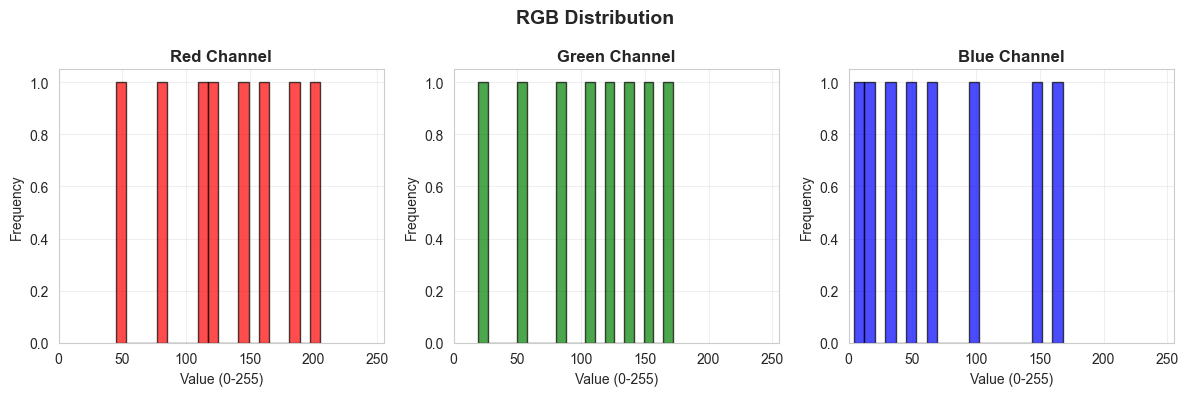

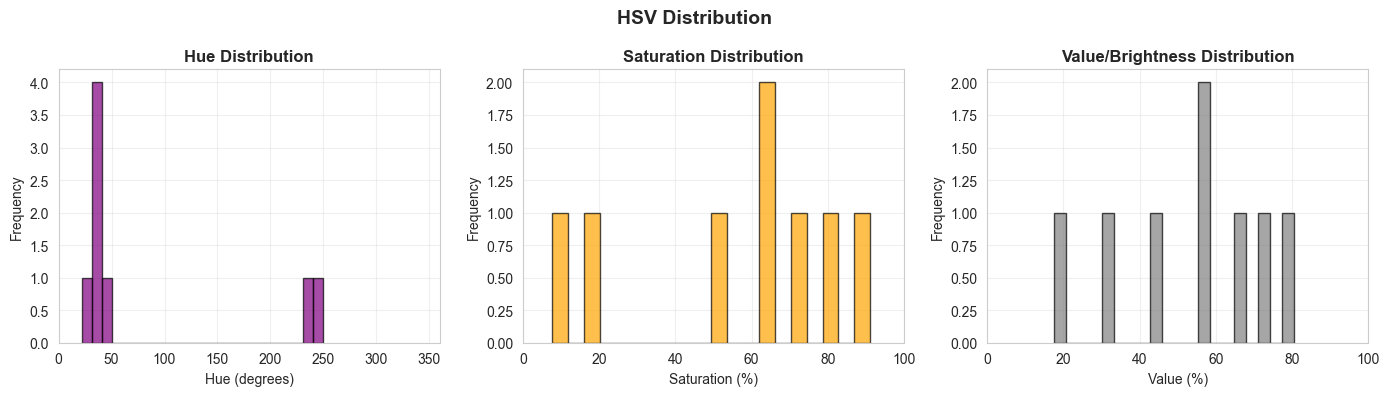

In [3]:
# Extract and analyze
works = analyzer.extract_artist_works('claude-monet', limit=5)
colors = extractor.extract_dominant_colors(works[0]['image'], n_colors=8)

# Visualize in RGB space
visualizer.plot_rgb_distribution(colors)

# Visualize in HSV space
visualizer.plot_hsv_distribution(colors)

## 4. Color Statistics

In [4]:
stats = color_analyzer.analyze_palette_statistics(colors)
print(f"Mean Saturation: {stats['mean_saturation']:.1f}%")
print(f"Mean Brightness: {stats['mean_value']:.1f}%")
print(f"Mean Hue: {stats['mean_hue']:.1f}°")

Mean Saturation: 55.9%
Mean Brightness: 53.3%
Mean Hue: 22.0°


## 5. Color Relationships

In [5]:
# Detect complementary colors
complementary = color_analyzer.detect_complementary_colors(colors)
print(f"Found {len(complementary)} complementary pairs")

# Calculate contrast ratio
if len(colors) >= 2:
    ratio = color_analyzer.calculate_contrast_ratio(colors[0], colors[1])
    print(f"Contrast ratio: {ratio:.2f}:1")

Found 6 complementary pairs
Contrast ratio: 1.44:1


## 6. Color Temperature Analysis

In [6]:
temp_dist = color_analyzer.analyze_color_temperature_distribution(colors)
print(f"Warm colors: {temp_dist['warm_percentage']:.1f}%")
print(f"Cool colors: {temp_dist['cool_percentage']:.1f}%")
print(f"Dominant: {temp_dist['dominant_temperature']}")

Warm colors: 75.0%
Cool colors: 12.5%
Dominant: warm
